# COMP4030 - Data Science and Machine Learning - Coursework 2

In [2]:
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

In [115]:
gestures = ['circle', 'come', 'go', 'wave']
users = ['shreeya', 'ash']
raw_data_columns = ['time', 'x', 'y', 'z', 'abs']

In [118]:
def get_data(scaler, trim=0.1):
      sheets = []
      for g in gestures:
            for user in users:
                  for i in range(1, 9):
                        data = pd.read_csv(f'data/{g}/{user}_{i}.csv')
                        data.columns = raw_data_columns

                        data = data[(data['time'] >= data['time'].quantile(trim)) 
                                    & (data['time'] <= data['time'].quantile(1 - trim))] ## trim the edges of the data

                        scaled_features = scaler.fit_transform(data)
                        df = pd.DataFrame(scaled_features, columns=data.columns)
                        df['i'] = i
                        df['g'] = g
                        df['user'] = user
                        sheets.append(df)

      return pd.concat(sheets, ignore_index=True)

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

df = get_data(scaler, trim=0.1)

In [120]:
df.groupby(['g']).head()

time         x         y         z       abs  i       g     user
0      0.000000  0.177575  0.320961  0.763699  0.333084  1  circle  shreeya
1      0.001095  0.150696  0.299172  0.753958  0.356847  1  circle  shreeya
2      0.002191  0.125034  0.280855  0.740720  0.377524  1  circle  shreeya
3      0.003286  0.105752  0.267762  0.728565  0.393058  1  circle  shreeya
4      0.004381  0.089425  0.258755  0.714949  0.403776  1  circle  shreeya
12476  0.000000  0.715939  0.795008  0.206241  0.558975  1    come  shreeya
12477  0.001224  0.662044  0.812926  0.237148  0.489285  1    come  shreeya
12478  0.002448  0.586390  0.826743  0.274771  0.403515  1    come  shreeya
12479  0.003672  0.543612  0.847565  0.314271  0.319197  1    come  shreeya
12480  0.004896  0.563493  0.870167  0.351951  0.250901  1    come  shreeya
26569  0.000000  0.384281  0.565440  0.072929  0.411155  1      go  shreeya
26570  0.001333  0.410942  0.584137  0.078321  0.415698  1      go  shreeya
26571  0.002667  0.436472  0.585102  0.096151  0.407694  1      go  shreeya
26572  0.004000  0.475771  0.584704  0.135900  0.387447  1      go  shreeya
26573  0.005333  0.508049  0.586343  0.186948  0.360580  1      go  shreeya
40216  0.000000  0.109762  0.674219  0.367389  0.564229  1    wave  shreeya
40217  0.001112  0.126019  0.713030  0.375370  0.522988  1    wave  shreeya
40218  0.002225  0.142991  0.740583  0.411546  0.478559  1    wave  shreeya
40219  0.003337  0.149863  0.763764  0.443131  0.459465  1    wave  shreeya
40220  0.004449  0.143831  0.768917  0.460859  0.472662  1    wave  shreeya

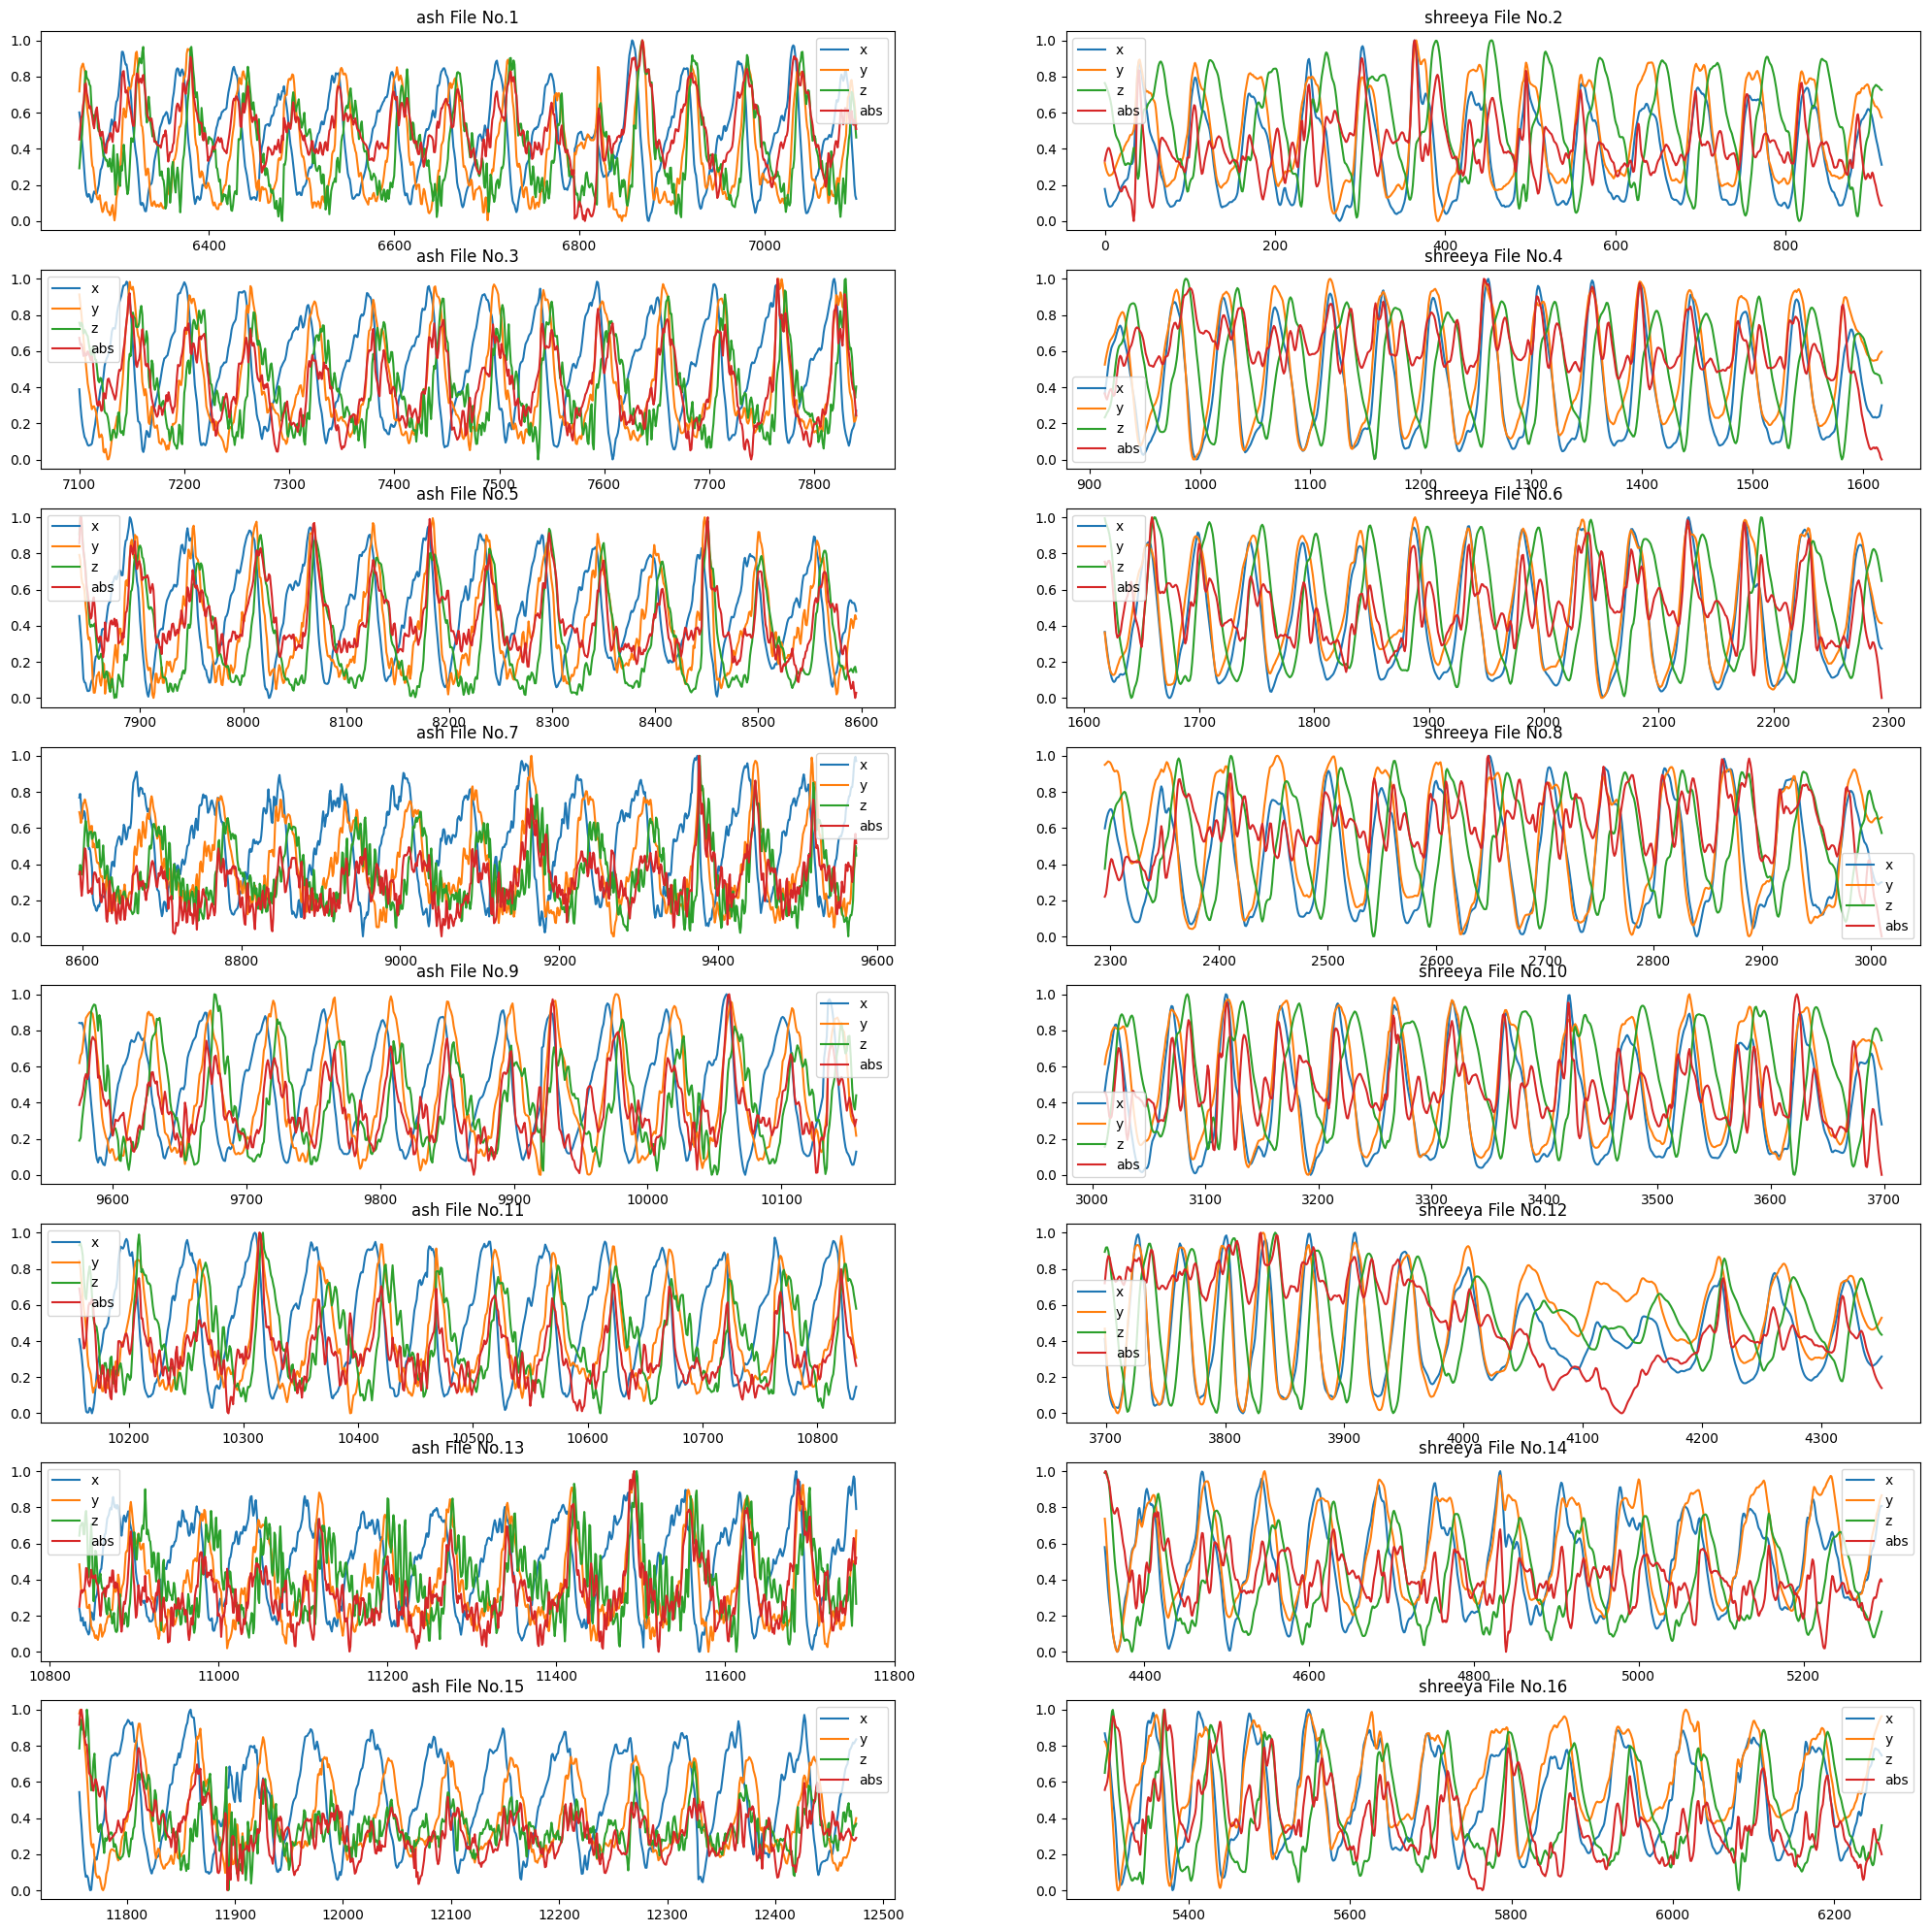

In [123]:
plt.figure(figsize=(25, 25))

for ui, user in enumerate(['shreeya', 'ash']):
      
      group = df[(df['g'] == 'circle') & (df['user'] == user)].groupby('i')
      for i, dfr in enumerate(group):
            place = ((i + 1) * 2 ) - ui
            plt.subplot(len(group), 2, place)
            
            for col in ['x', 'y', 'z', 'abs']:
                  plt.plot(dfr[1].index, dfr[1][col], label=col)
                  plt.title(f'{user} File No.{place}')
                  plt.legend()


In [68]:
def segment_gestures(gesture, threshold = 0.5, column='y', paired=True):
    subset = df[(df['i'] == 1) & (df['g'] == gesture)]
    crosses_threshold = ((subset[column] > threshold) & (subset[column].shift(1) <= threshold)) | ((subset[column] < threshold) & (subset[column].shift(1) >= threshold))
    crossing_indices = crosses_threshold[crosses_threshold].index.tolist()
    segments = [subset.iloc[start:end] for start, end in zip([0] + crossing_indices, crossing_indices + [len(subset)])]
    if not paired:
        return segments
    
    paired_segments = []
    for i in range(0, len(crossing_indices)-1, 2):
        start = crossing_indices[i]
        end = crossing_indices[i + 2] if i + 2 < len(crossing_indices) else len(subset)
        paired_segments.append(subset.iloc[start:end])
        
    return paired_segments

In [76]:
def plot_first_n(data, n=10):
    import math 
    plt.figure(figsize=(20, 10))
    
    for i, segment in enumerate(data[:n]):
        plt.subplot(math.ceil(n / 2), 2, i + 1)
        for col in ['x', 'y', 'z', 'abs']:
            plt.plot(segment['time'], segment[col], label=col)
            plt.legend()

    plt.show()

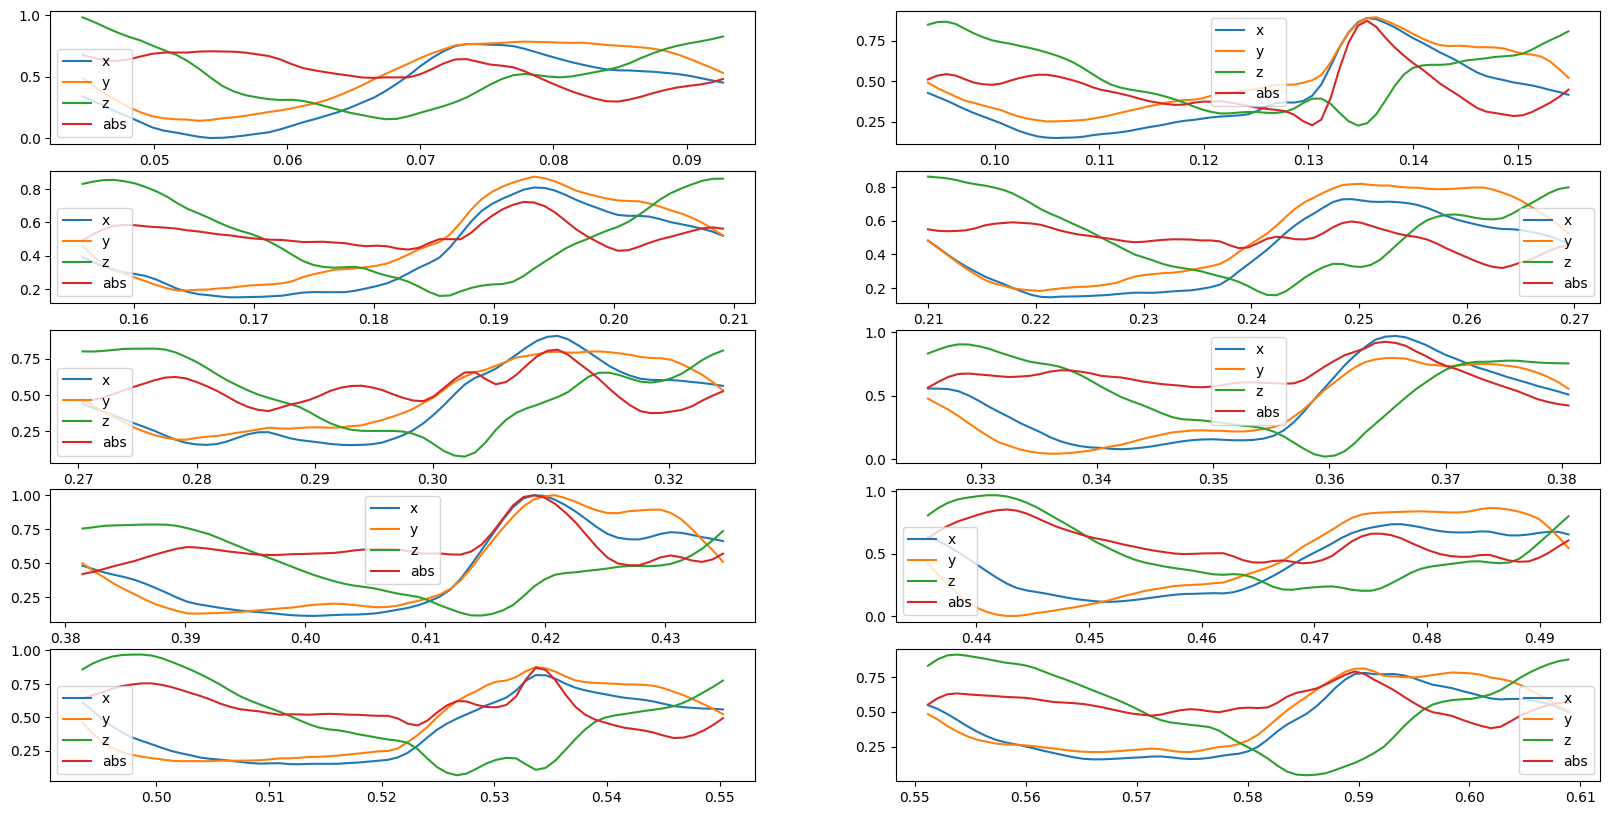

In [77]:
paired_segments = segment_gestures('circle')
plot_first_n(paired_segments, 10)

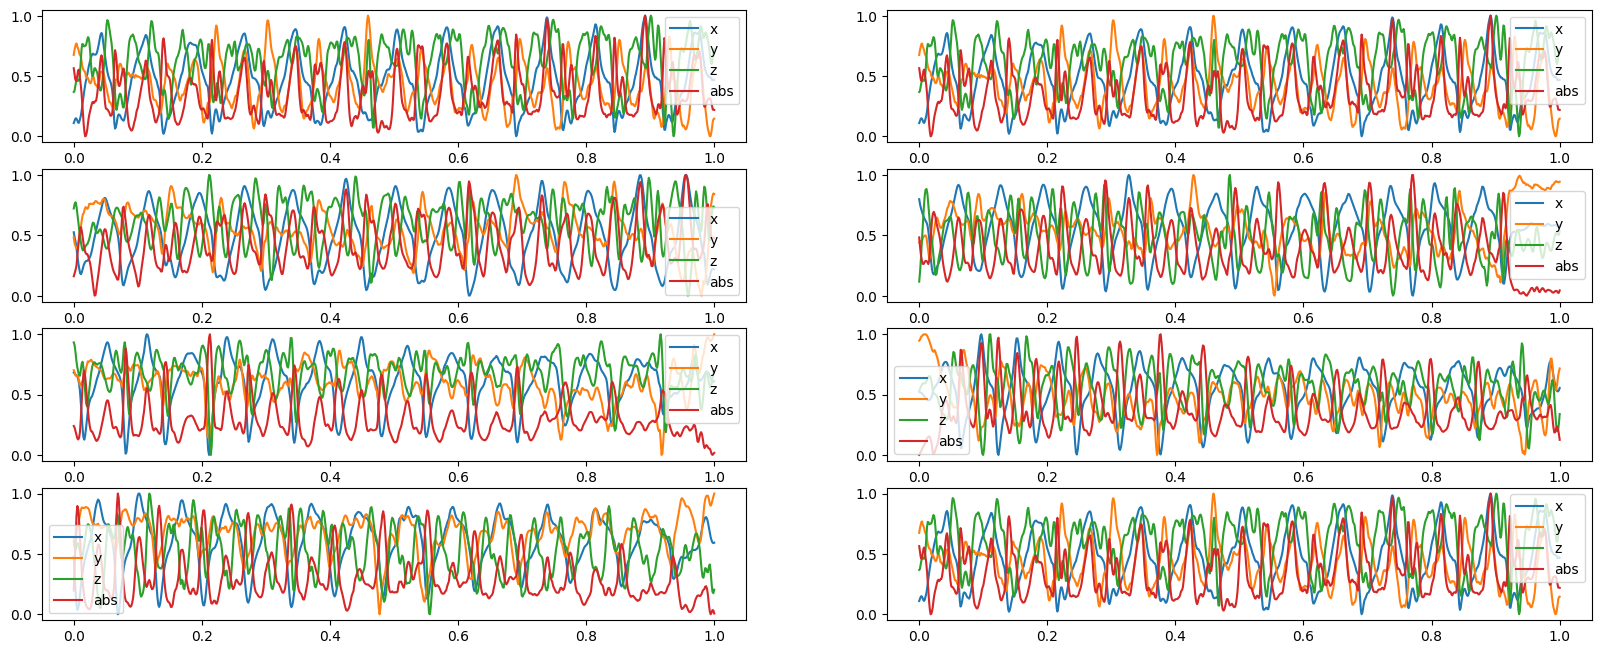

In [66]:
plt.figure(figsize=(20, 10))

for i, dfr in enumerate(df[df['g'] == 'wave'].groupby('i')):
      plt.subplot(5, 2, i + 1)
      for col in dfr[1].columns[1:-2]:
            plt.plot(dfr[1]['time'], dfr[1][col], label=col)
            plt.legend()

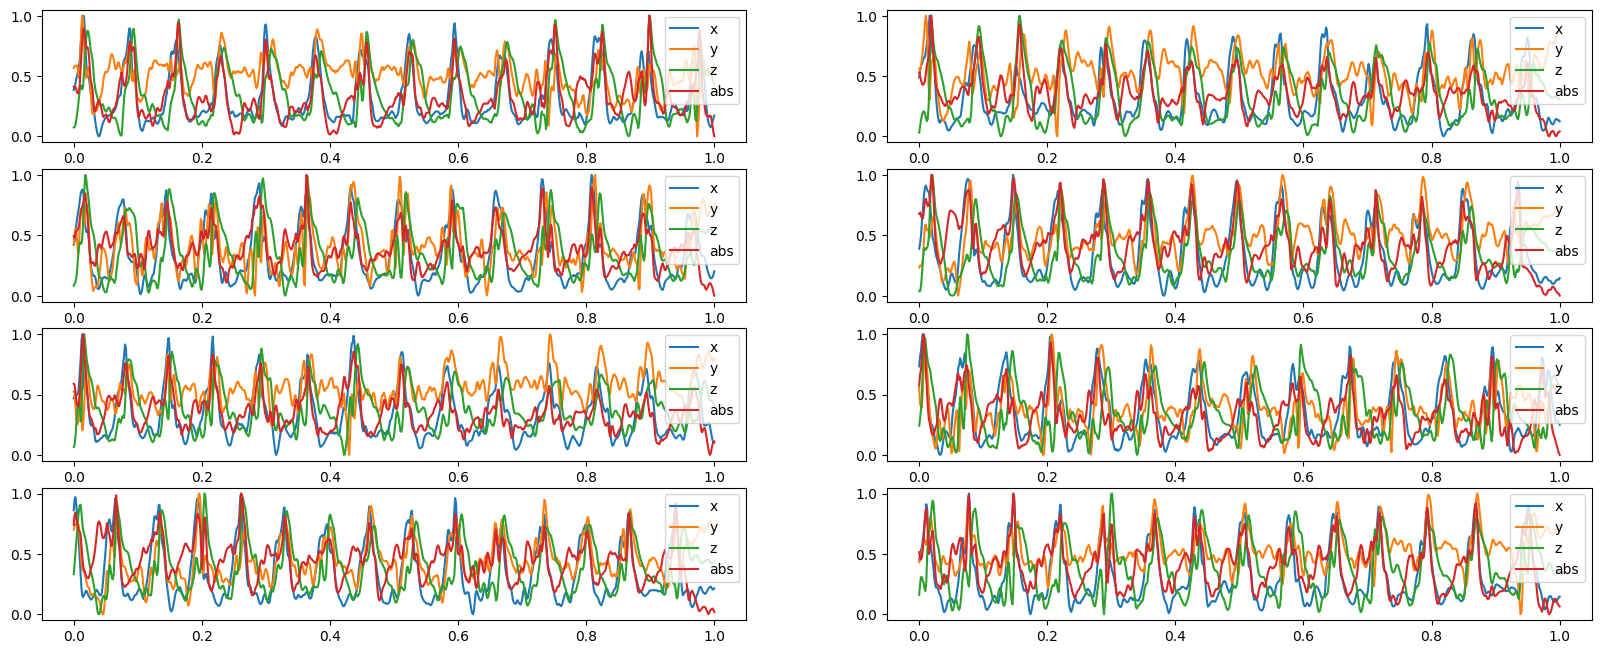

In [67]:
plt.figure(figsize=(20, 10))

for i, dfr in enumerate(df[df['g'] == 'go'].groupby('i')):
      plt.subplot(5, 2, i + 1)
      for col in dfr[1].columns[1:-2]:
            plt.plot(dfr[1]['time'], dfr[1][col], label=col)
            plt.legend()

In [ ]:
# plt.figure(figsize=(20, 10))

# for i, df in enumerate(aligned_dataframes.values()):
#       plt.subplot(5, 2, i + 1)
#       for col in df.columns[1:]:
#             plt.plot(df['time'], df[col], label=col)
#             plt.legend()

In [ ]:
def segment_data(df, window_size, overlap_size, time_column='time', ):
    """
    Segments the data into fixed-size windows.
    
    Parameters:
    - df: DataFrame containing the accelerometer data.
    - window_size: Size of each window in seconds.
    - overlap_size: Size of the overlap between consecutive windows in seconds.
    - time_column: The name of the column containing the timestamp data.
    
    Returns:
    - A list of segmented DataFrames.
    """
    # Convert timestamps to datetime if not already
    df[time_column] = pd.to_datetime(df[time_column], unit='s')
    
    # Sort the dataframe by timestamp to ensure correct window ordering
    df = df.sort_values(by=time_column)
    
    # Calculate the window step size
    step_size = window_size - overlap_size
    
    # Initialize variables
    segments = []
    start_time = df[time_column].min()
    end_time = start_time + pd.Timedelta(seconds=window_size)

    last_time = df[time_column].max()
    
    # Segment the data
    while start_time + pd.Timedelta(seconds=overlap_size) < last_time:
        # Create a mask for the current window
        mask = (df[time_column] >= start_time) & (df[time_column] < end_time)
        segment = df.loc[mask]
        
        if not segment.empty:
            segments.append(segment)
        
        # Update the start and end times for the next window
        start_time += pd.Timedelta(seconds=step_size)
        end_time = start_time + pd.Timedelta(seconds=window_size)
    
    return segments

segmented_data = segment_data(df, window_size=2, overlap_size=1)
print(segmented_data)

for segment in segmented_data:
    segment['label'] = "circle"
    print(segment)
    # plt.figure(figsize=(20, 5))
    # for col in segment.columns[1:-1]:
    #     plt.plot(segment['time'], segment[col], label=col)
    #     plt.legend()

    # plt.show()

In [ ]:
# Example of extracting simple features: mean and standard deviation
def extract_features(segment):
    features = {}
    for axis in ['x', 'y', 'z', 'abs']:
        features[f'{axis}_mean'] = segment[axis].mean()
        features[f'{axis}_std'] = segment[axis].std()
    return features

# Assuming `segments` is a list of your labeled segments (each a DataFrame)
features_list = [extract_features(segment) for segment in segmented_data]
features_df = pd.DataFrame(features_list)
labels = [segment['label'].iloc[0] for segment in segmented_data]  # Assuming each segment has a uniform label
features_df


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


In [ ]:
def predict_gesture(segment):
    features = extract_features(segment)
    features_df = pd.DataFrame([features])  # Convert to DataFrame to match training shape
    prediction = model.predict(features_df)
    return prediction[0]

# Example: Predict the gesture of a new segment
new_segment = segments[0]  # This should be a new, unseen segment
print(predict_gesture(new_segment))


In [ ]:
for i, segment in enumerate(segmented_data):
    plt.figure(figsize=(10, 6))
    for axis in ['acc_x', 'acc_y', 'acc_z']:
        plt.plot(segment['timestamp'], segment[axis], label=axis)
    plt.legend()
    plt.title(f'Segment {i}')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()
    
    # Prompt for the label
    label = input(f"Enter label for Segment {i}: ")
    segment['label'] = label

In [ ]:
plt.figure(figsize=(20, 5))
for col in df.columns[1:]:
      plt.plot(df['Time (s)'], df[col], label=col)
      plt.legend()
plt.xticks(np.arange(0, df['Time (s)'].max(), 0.5))
plt.show()


In [ ]:
peaks, _ = find_peaks(df['Gyroscope y (rad/s)'], height=1.5)  # Peaks with height > 0
troughs, _ = find_peaks(-df['Gyroscope y (rad/s)'], height=-1.5)  # Troughs in the inverted data

plt.figure(figsize=(20, 5))
# plt.plot(df['Time (s)'], peaks, label='peaks')  # Plot rolling average

for col in df.columns[1:]:
      rolling_avg = df[col].rolling(window=100).mean()  # Calculate rolling average
      plt.plot(df['Time (s)'], rolling_avg, label=col + ' (Rolling Avg)')  # Plot rolling average
      plt.legend()
plt.xticks(np.arange(0, df['Time (s)'].max(), 0.5))
plt.show()


In [ ]:
# peaks_indices = []

# for dfr in df.groupby(['i', 'g']):
#     signal = dfr[1]['y'].values
#     peaks, _ = find_peaks(signal)
#     peaks_indices.append(peaks)

# reference_peak = 1
# reference_index = peaks_indices[0][reference_peak]

# aligned_dataframes = []
# i = 0

# for dfr in df.groupby(['i', 'g']):

#     shift_amount = reference_index - peaks_indices[i][reference_peak]

#     shifted_signal = np.roll(dfr[1]['y'].values, shift_amount)

#     aligned_df = pd.DataFrame(shifted_signal, columns=['y'])
#     aligned_dataframes.append(aligned_df)
#     i += 1

# aligned_df = pd.concat(aligned_dataframes, ignore_index=True)
# aligned_df